In [2]:
import astropy.table as apt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn-notebook')
mpl.rcParams['figure.dpi'] = 400

In [3]:
df = pd.read_table("/home/taranu/raid/lsst/fit_bench_100x100_psffwhm-3.500e+00_oversample-3.dat", delim_whitespace=True)

print(list(df))

cols = ["nser", "ang", "axrat", "re"]
valsuniq = {}
for col in cols:
    valsuniq[col] = df[col].drop_duplicates().values

colscombine = ()
for col in ["ang", "axrat", "re"]:
    colscombine += (valsuniq[col],)

lennsers = len(valsuniq["nser"])

ncols = np.min([4, np.int(np.floor(np.sqrt(lennsers)))])
nrows = np.int(np.ceil(lennsers/ncols))

print(valsuniq)
print(ncols, nrows)

valstoplot = {}
for col in ["ang", "axrat"]:
    valinds = [0, np.int(np.ceil(len(valsuniq[col])/2))-1, len(valsuniq[col])-1]
    valstoplot[col] = valsuniq[col][valinds]

['nser', 'ang', 'axrat', 're', 'box', 'CPU_t', 'CPU_e', 'CPU_n', 'CPU_GS_ft_t', 'CPU_GS_ft_e', 'CPU_GS_ft_n']
{'nser': array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75,
       6.  ]), 'ang': array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]), 'axrat': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 're': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])}
4 6


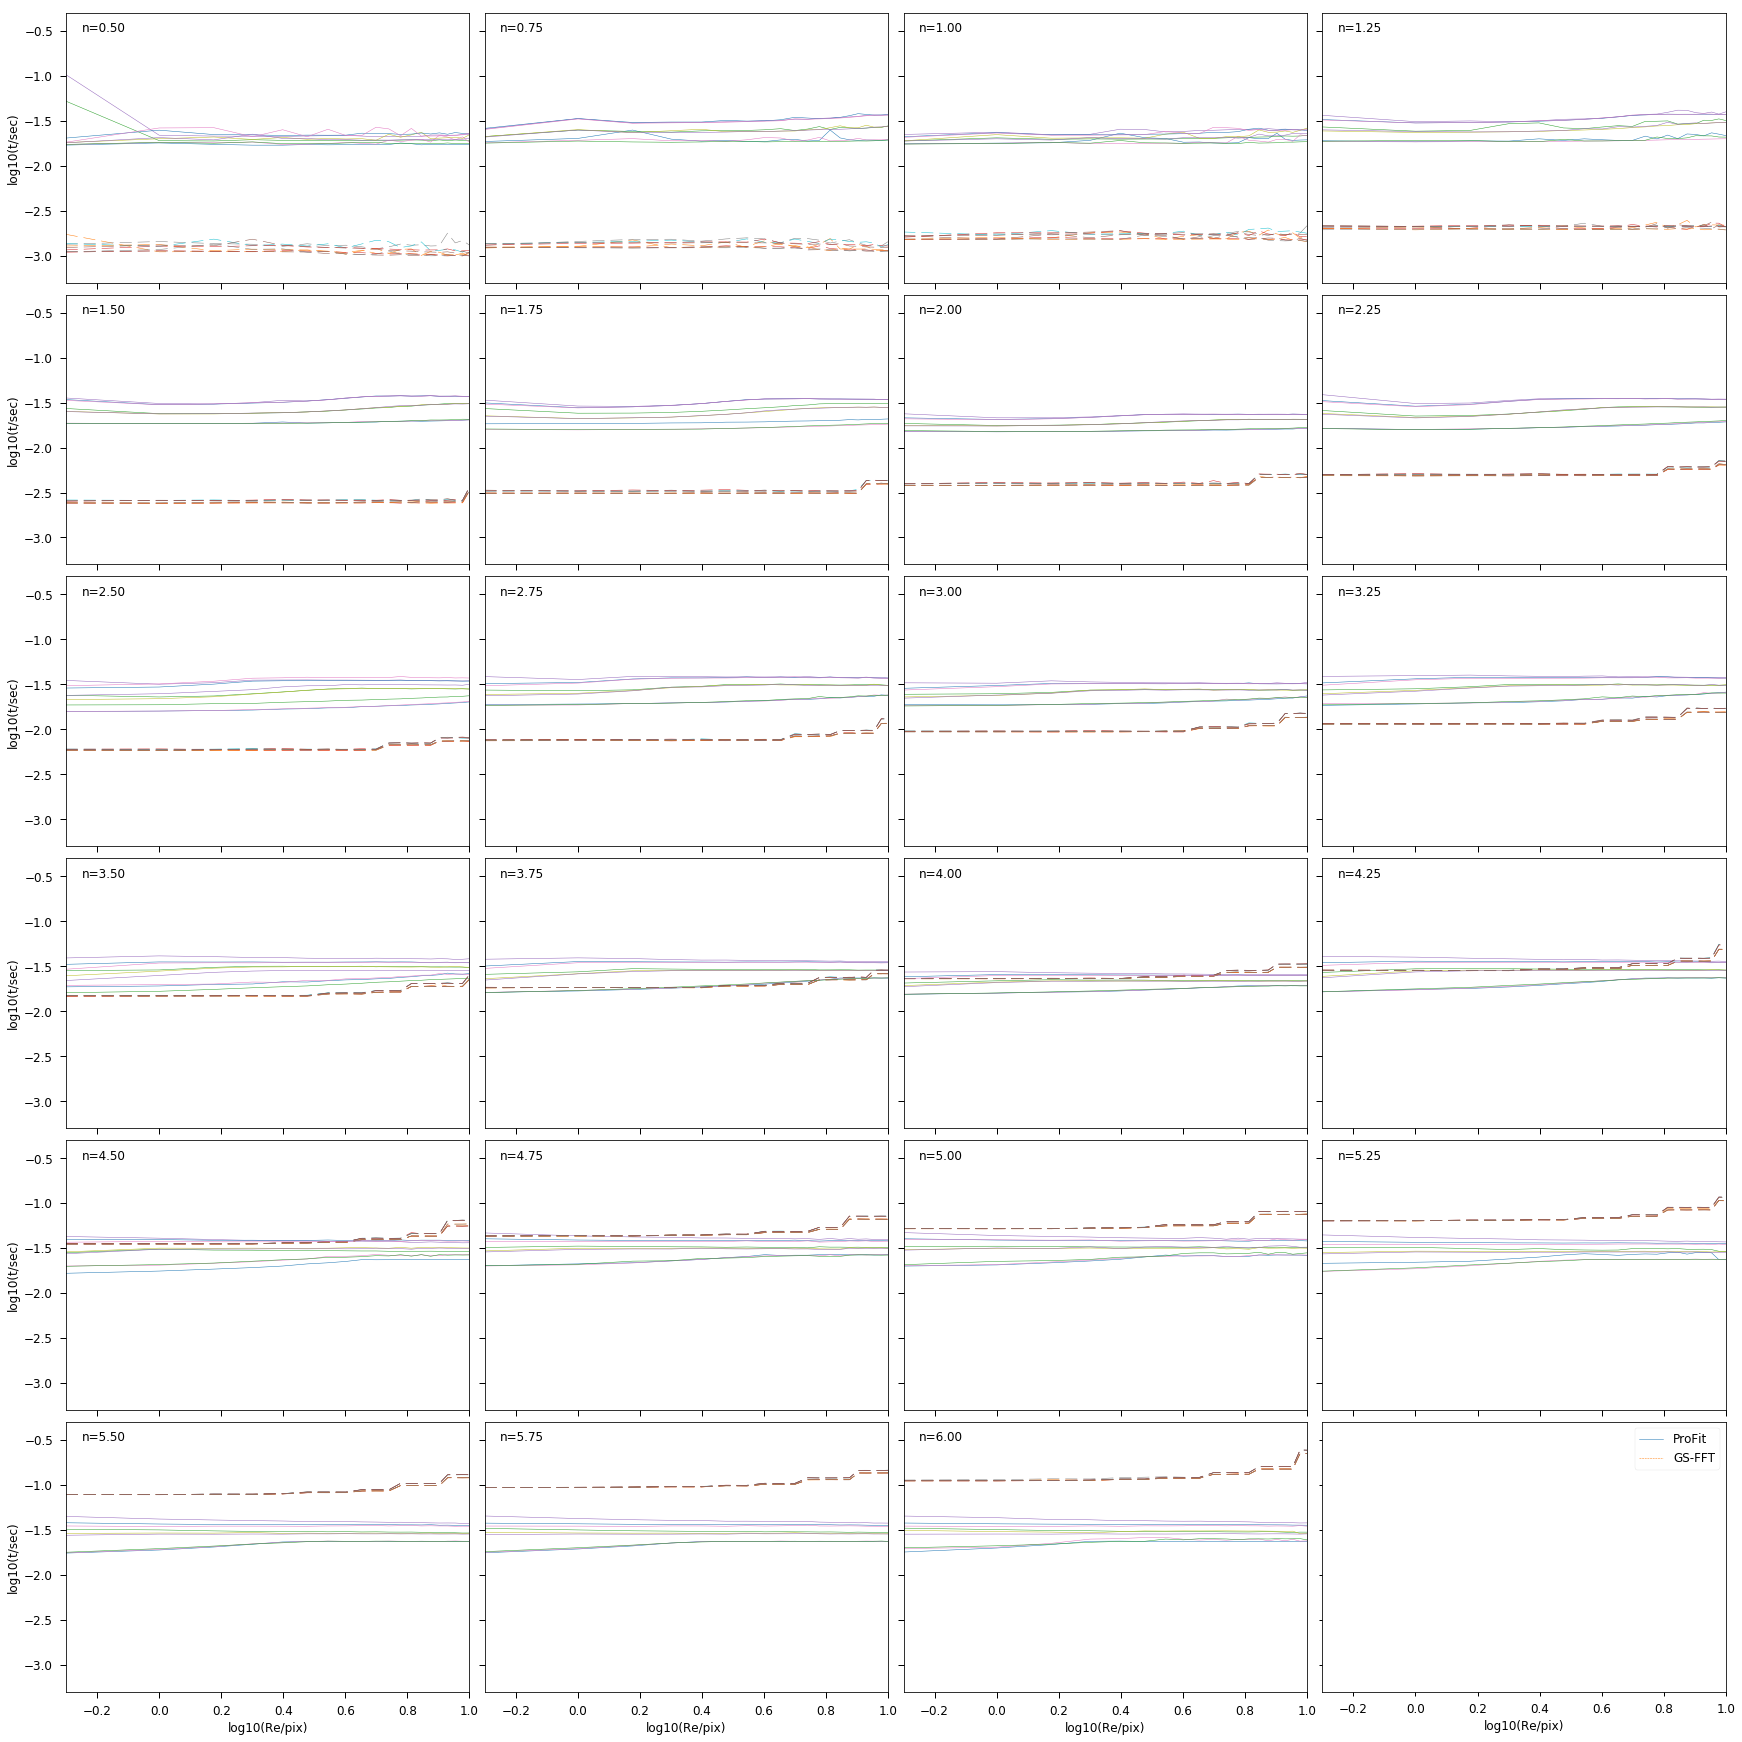

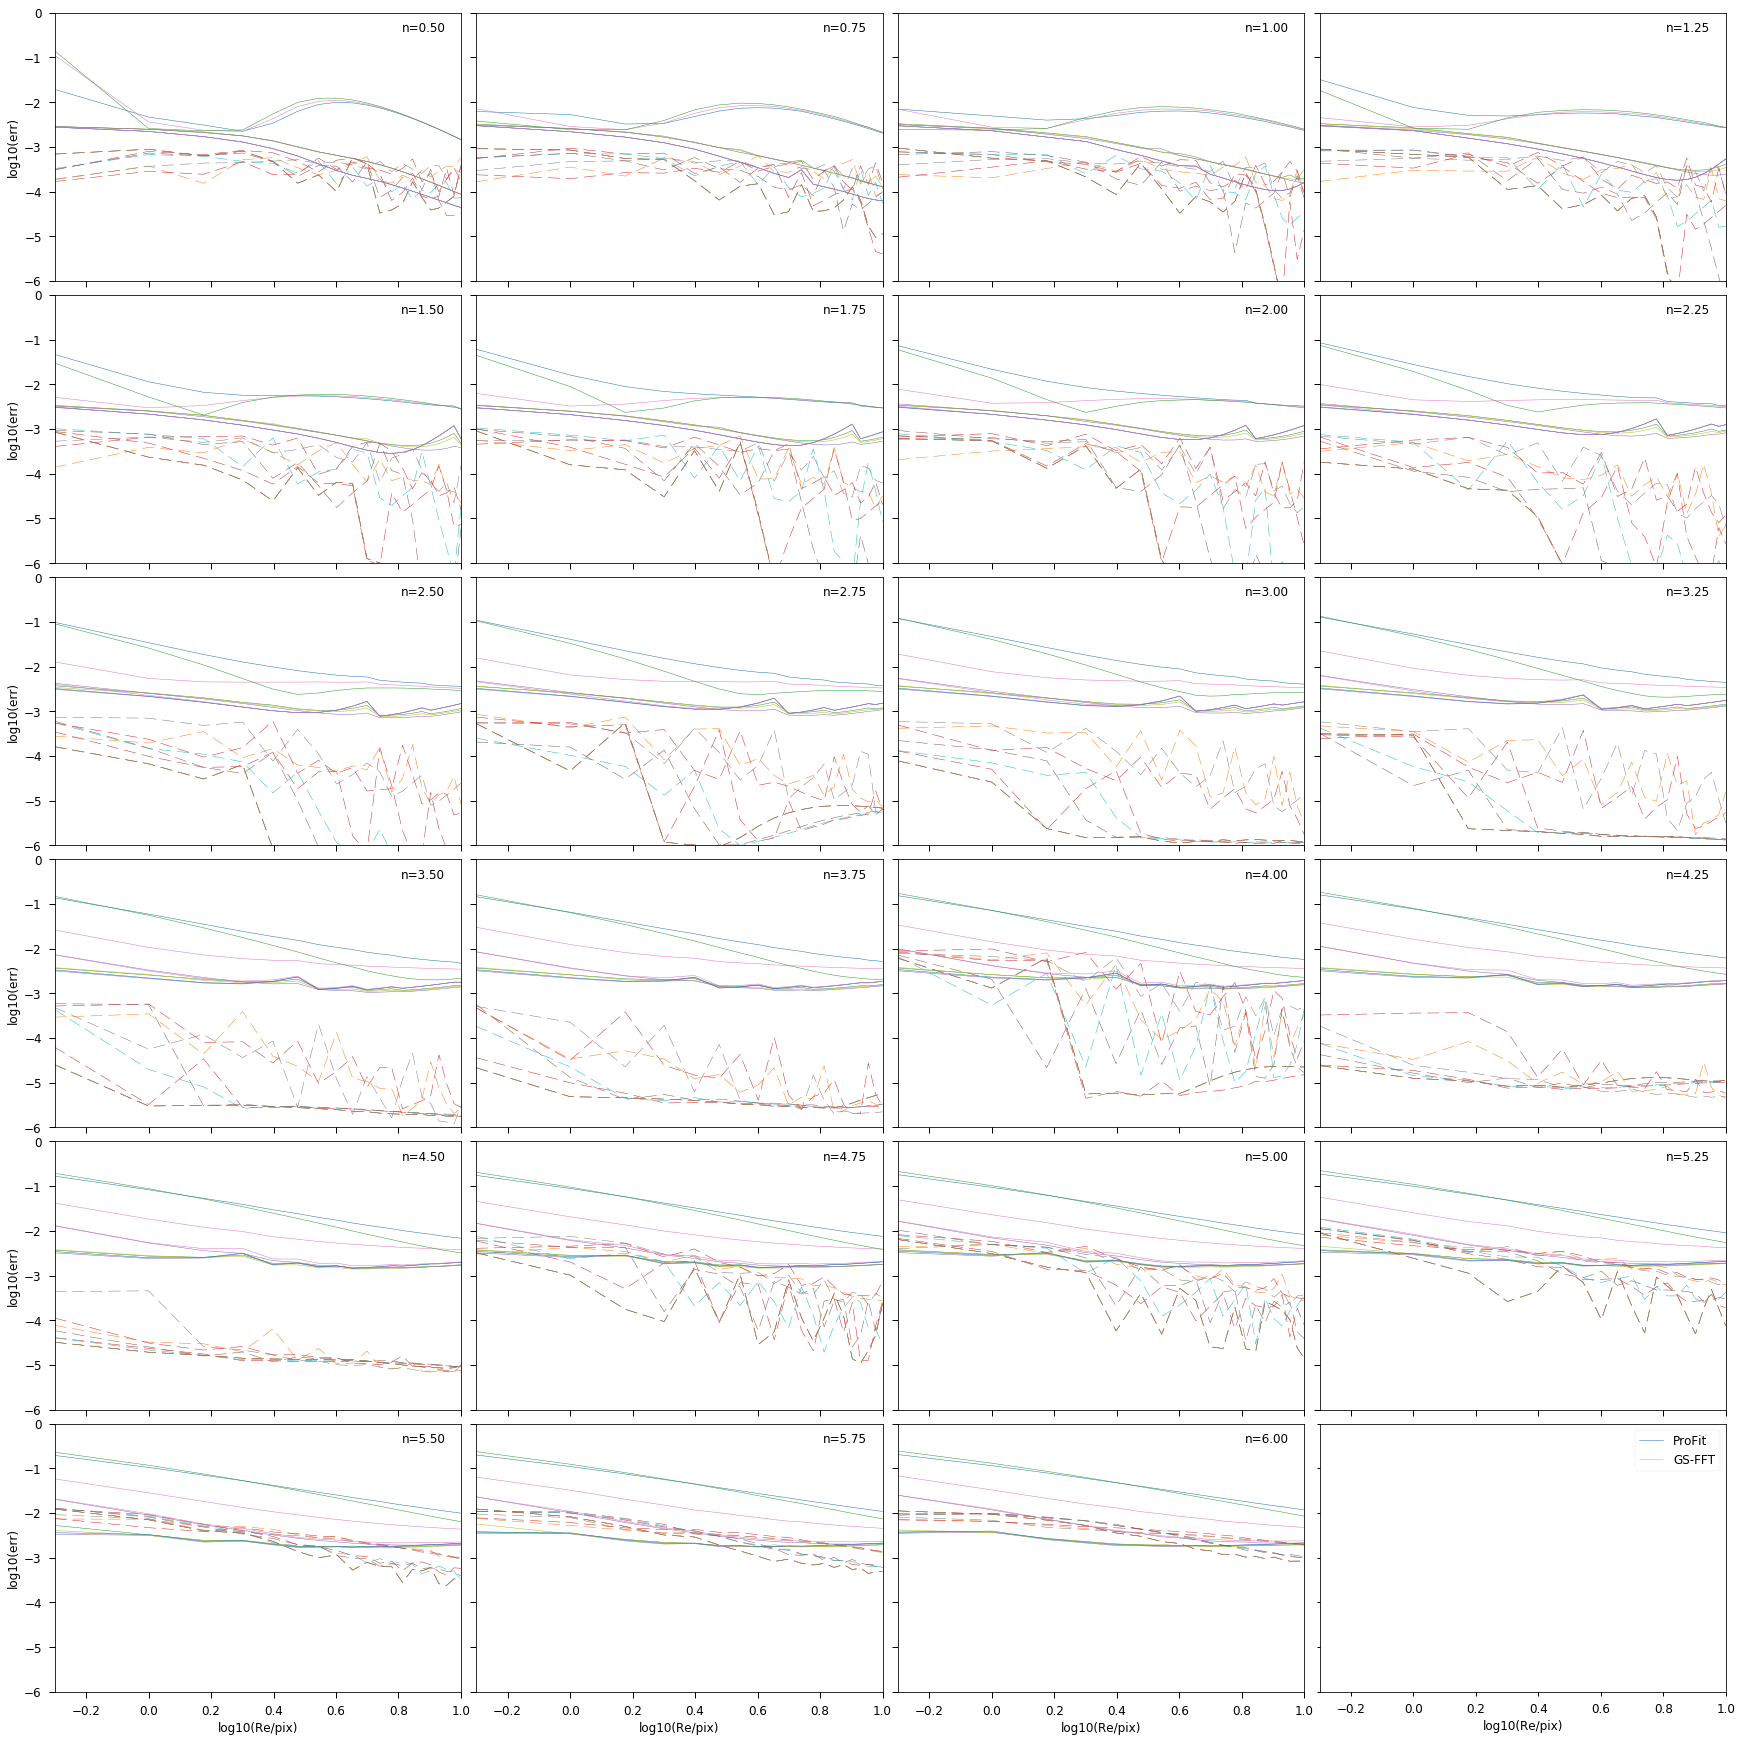

In [42]:
%matplotlib inline
savefigs = True

plottypes = {
    "time": {
        "label": "log10(t/sec)"
        , "limits": [-3.3, -0.3]
        , "columns": ["CPU_t", "CPU_GS_ft_t"]
        , "linestyles": ["-", "--"]
        , "sublabel": {"xy": [-0.25, -0.4], "va": "top", "ha": "left"}
        , "linewidth": 0.5
    }
    , "err": {
        "label": "log10(err)"
        , "limits": [-6, 0]
        , "columns": ["CPU_e", "CPU_GS_ft_e"]
        , "linestyles": ["-", "--"]
        , "sublabel": {"xy": [0.95, -0.2], "va": "top", "ha": "right"}
        , "linewidth": 0.5
    }
}

for plottype in plottypes.keys():
    plotinfo = plottypes[plottype]
    plotinfosub = plotinfo["sublabel"]
    linewidth = plotinfo["linewidth"]
    linestyles = plotinfo["linestyles"]
    
    fig, axesfig = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(24, 24), facecolor='w')
    axesplot = {"row": None, "col": []}
    for i, nser in enumerate(valsuniq["nser"]):
        col = i % ncols
        row = np.int(np.floor(i / ncols))
        subplot = axesfig[row][col]
        subplot.tick_params(axis='both', which='major', labelsize=12)
        subplot.tick_params(axis='both', which='minor', labelsize=10)
        subplot.text(plotinfosub["xy"][0], plotinfosub["xy"][1],
                     "n={:.2f}".format(nser), fontsize=12,
                     verticalalignment=plotinfosub["va"],
                     horizontalalignment=plotinfosub["ha"])
        if i == 0:
            subplot.set_ylim(plotinfo["limits"][0], plotinfo["limits"][1])
            subplot.set_xlim(-0.3, 1)
        subplot.tick_params(length=6, width=1)
        if col == 0:
            subplot.set_ylabel(plotinfo["label"], fontsize=12)
        if row == (nrows-1):
            subplot.set_xlabel("log10(Re/pix)", fontsize=12)
        for ang in valstoplot["ang"]:
            for axrat in valstoplot["axrat"]:
                cond = (df["nser"] == nser) & (df["ang"] == ang) & (df["axrat"] == axrat)
                for column, linestyle in zip(plotinfo["columns"], linestyles):
                    lineargs = {"linewidth": linewidth}
                    if linestyle == "--":
                        lineargs["dashes"] = (24, 12)
                    lines = subplot.plot(np.log10(df.loc[cond, "re"]),
                                         np.log10(df.loc[cond, column]),
                                         **lineargs)
    
    subplot = axesfig[nrows-1][ncols-1]
    for linestyle in linestyles:
        subplot.plot([], [], linewidth=linewidth, linestyle=linestyle)
    subplot.tick_params(axis='both', which='major', labelsize=12)
    subplot.tick_params(axis='both', which='minor', labelsize=10)
    subplot.set_xlabel("log10(Re/pix)", fontsize=12)
    plt.legend(["ProFit", "GS-FFT"], fontsize=12)
    plt.tight_layout(0, 0, 0)
    if savefigs:
        plt.savefig("/home/taranu/raid/lsst/pyprofit-libprofit-vs-galsim-{:s}.png".format(plottype))
        plt.savefig("/home/taranu/raid/lsst/pyprofit-libprofit-vs-galsim-{:s}.eps".format(plottype))
